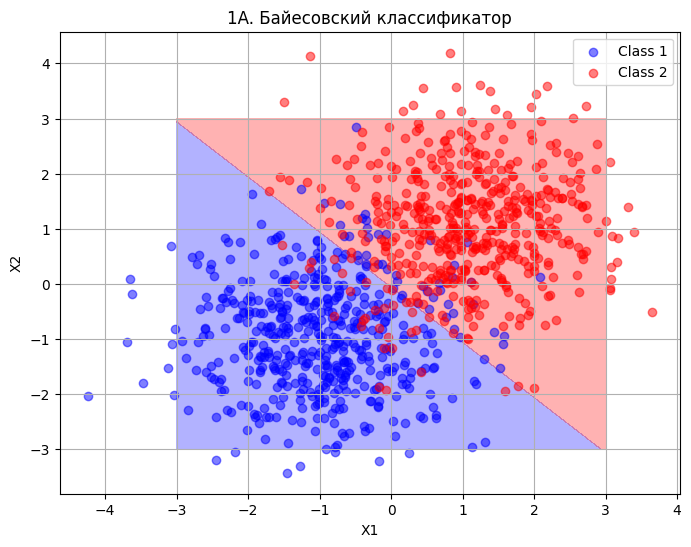

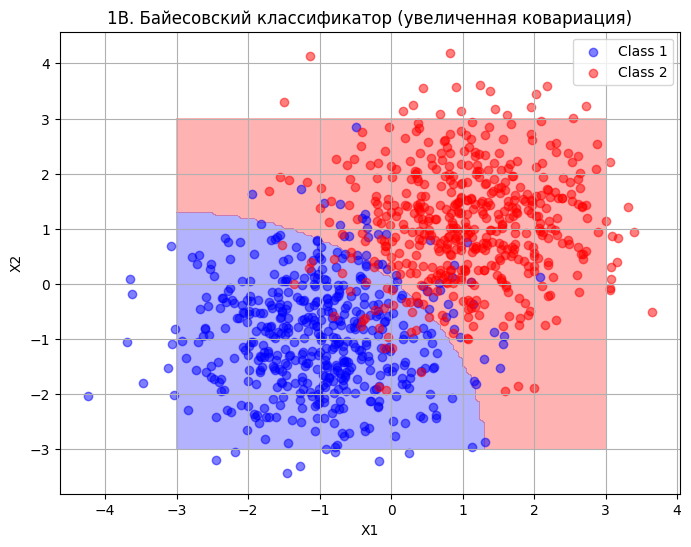

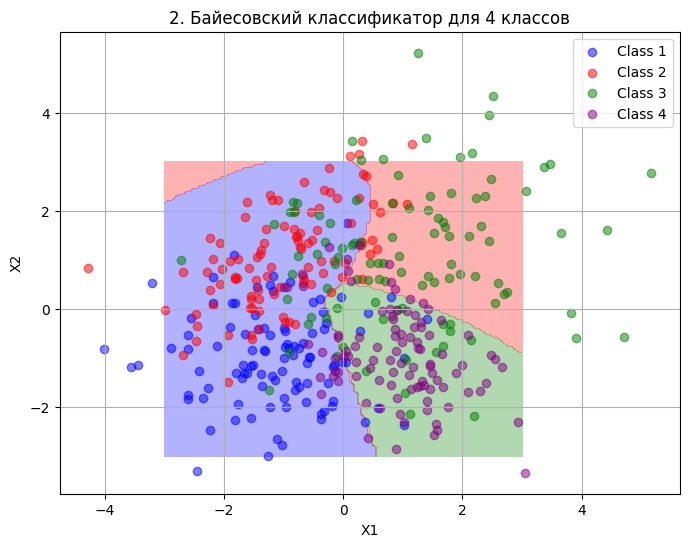

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Вариант 1А: Случай полной априорной информации

def generate_data(mu, sigma, n_points):
    """Генерация данных для класса"""
    return np.random.multivariate_normal(mu, sigma, n_points)

def predict_class(x, mu1, sigma1, mu2, sigma2, prior1=0.5, prior2=0.5):
    """Классификатор на основе Байеса"""
    prob1 = multivariate_normal.pdf(x, mean=mu1, cov=sigma1) * prior1
    prob2 = multivariate_normal.pdf(x, mean=mu2, cov=sigma2) * prior2
    return 1 if prob1 > prob2 else 2

# Параметры классов
mu1 = np.array([-1, -1])
mu2 = np.array([1, 1])
sigma1 = np.array([[1, 0], [0, 1]])
sigma2 = np.array([[1, 0], [0, 1]])

# Генерация данных
np.random.seed(42)
class1_points = generate_data(mu1, sigma1, 500)
class2_points = generate_data(mu2, sigma2, 500)

data_points = np.vstack((class1_points, class2_points))
labels = np.array([1] * len(class1_points) + [2] * len(class2_points))

# Генерация решетки для классификации
grid_x, grid_y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid = np.c_[grid_x.ravel(), grid_y.ravel()]

# Классификация на решетке
predicted_grid = [predict_class(x, mu1, sigma1, mu2, sigma2) for x in grid]
predicted_grid = np.array(predicted_grid).reshape(grid_x.shape)

# Визуализация
plt.figure(figsize=(8, 6))
plt.contourf(grid_x, grid_y, predicted_grid, alpha=0.3, levels=[0, 1, 2], colors=['blue', 'red'])
plt.scatter(class1_points[:, 0], class1_points[:, 1], color='blue', alpha=0.5, label='Class 1')
plt.scatter(class2_points[:, 0], class2_points[:, 1], color='red', alpha=0.5, label='Class 2')
plt.title("1A. Байесовский классификатор")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid()
plt.show()

# Вариант 1Б: Случай увеличенной ковариации
sigma2 = np.array([[2, 0], [0, 2]])
predicted_grid = [predict_class(x, mu1, sigma1, mu2, sigma2) for x in grid]
predicted_grid = np.array(predicted_grid).reshape(grid_x.shape)

# Визуализация для варианта 1Б
plt.figure(figsize=(8, 6))
plt.contourf(grid_x, grid_y, predicted_grid, alpha=0.3, levels=[0, 1, 2], colors=['blue', 'red'])
plt.scatter(class1_points[:, 0], class1_points[:, 1], color='blue', alpha=0.5, label='Class 1')
plt.scatter(class2_points[:, 0], class2_points[:, 1], color='red', alpha=0.5, label='Class 2')
plt.title("1B. Байесовский классификатор (увеличенная ковариация)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid()
plt.show()

# Вариант 2: Четыре класса
mu_list = [
    np.array([-1, -1]),
    np.array([-1, 1]),
    np.array([1, 1]),
    np.array([1, -1])
]
sigma_list = [
    np.array([[1, 0], [0, 1]]),
    np.array([[1, 0.5], [0.5, 1]]),
    np.array([[2, 0], [0, 2]]),
    np.array([[1, -0.5], [-0.5, 1]])
]
prior_list = [0.25, 0.25, 0.25, 0.25]

# Генерация данных
class_points = [generate_data(mu, sigma, 100) for mu, sigma in zip(mu_list, sigma_list)]
data_points = np.vstack(class_points)
labels = np.concatenate([[i + 1] * 100 for i in range(4)])

# Классификатор для 4 классов
def predict_class_4(x):
    probs = [multivariate_normal.pdf(x, mean=mu, cov=sigma) * prior 
             for mu, sigma, prior in zip(mu_list, sigma_list, prior_list)]
    return np.argmax(probs) + 1

# Классификация на решетке
predicted_grid = [predict_class_4(x) for x in grid]
predicted_grid = np.array(predicted_grid).reshape(grid_x.shape)

# Визуализация для 4 классов
plt.figure(figsize=(8, 6))
plt.contourf(grid_x, grid_y, predicted_grid, alpha=0.3, levels=[1, 2, 3, 4], 
             colors=['blue', 'red', 'green', 'purple'])
colors = ['blue', 'red', 'green', 'purple']
for i, class_points in enumerate(class_points):
    plt.scatter(class_points[:, 0], class_points[:, 1], color=colors[i], alpha=0.5, label=f'Class {i + 1}')
plt.title("2. Байесовский классификатор для 4 классов")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid()
plt.show()


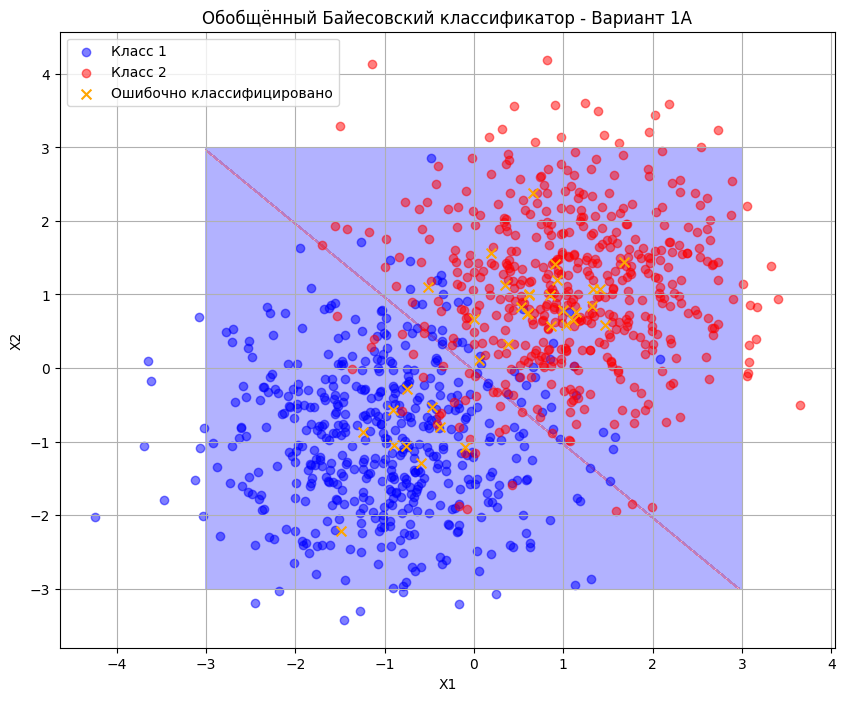

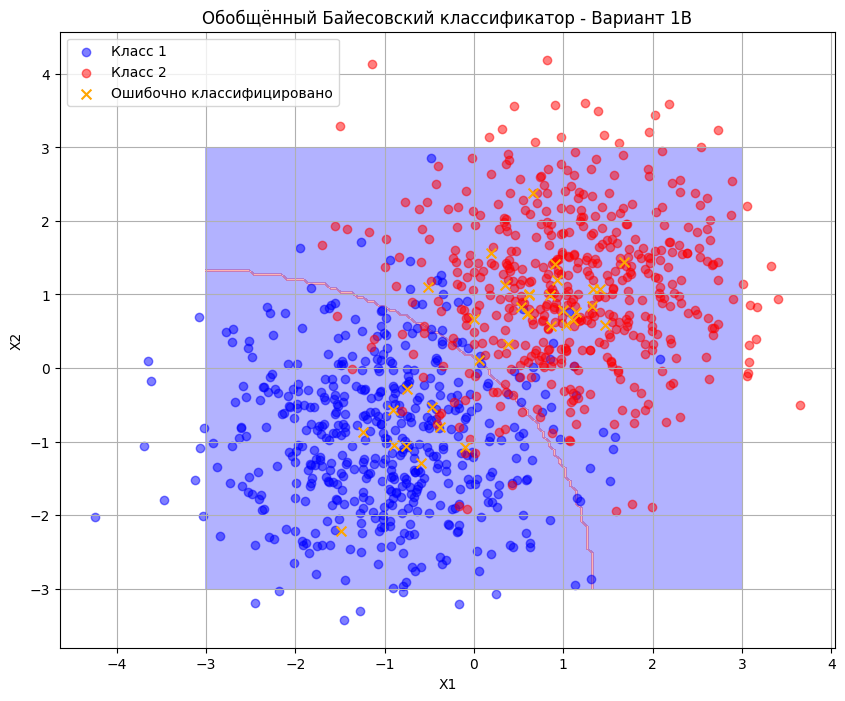

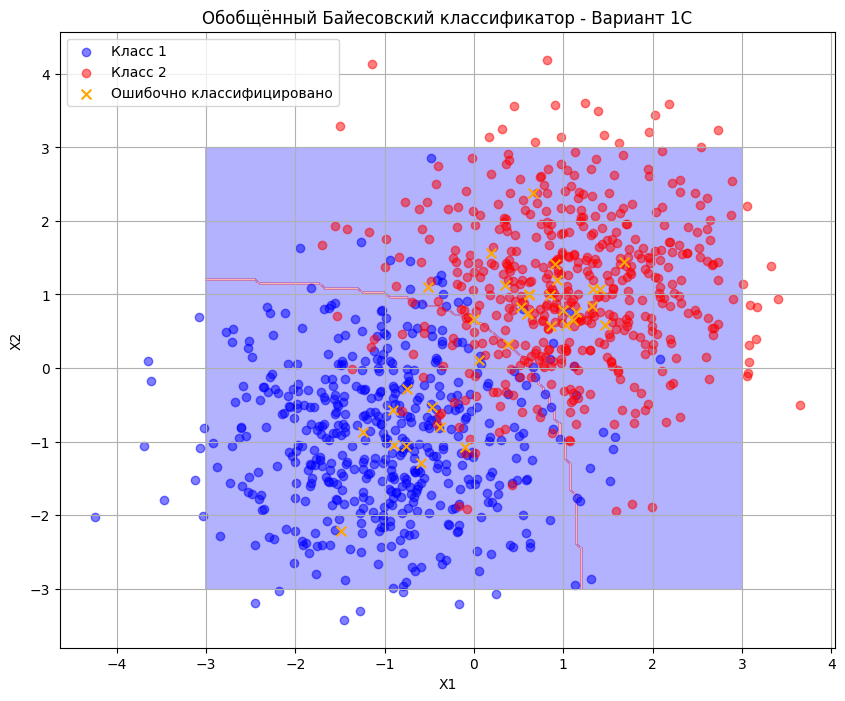

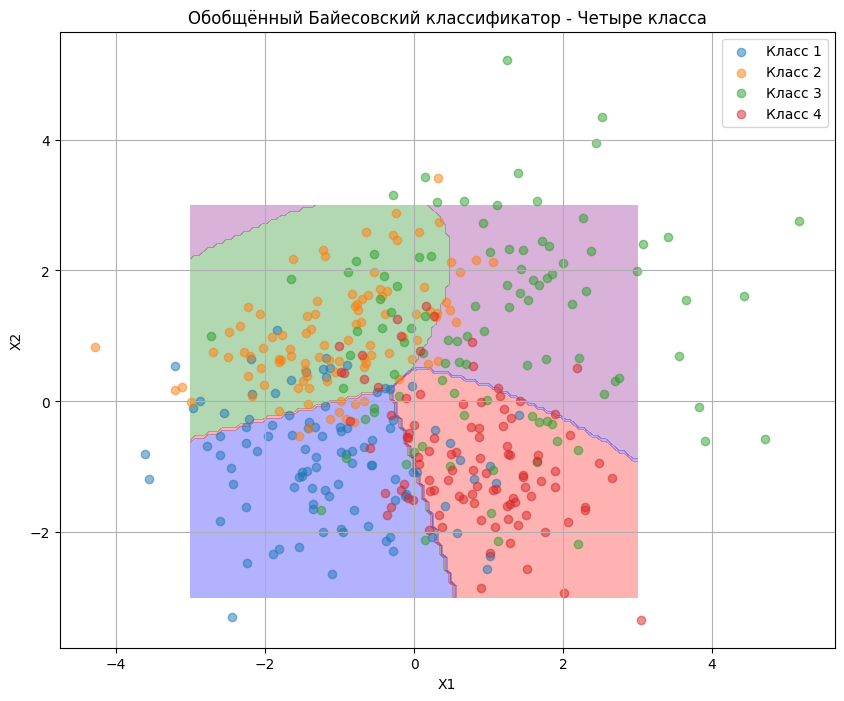

Вероятность ошибки (оценённая): 0.295
Теоретическая вероятность ошибки: 0.5
Интервальная оценка вероятности ошибки: [0.235 0.36 ]
Теоретическая вероятность ошибки не лежит в интервале.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, binom

# Случай полной априорной информации.
# Номер 1А
# Генерация данных для многомерных классов
mu1 = np.array([-1, -1])
mu2 = np.array([1, 1])
sigma1 = np.array([[1, 0], [0, 1]])
sigma2 = np.array([[1, 0], [0, 1]])

np.random.seed(42)
class1_points = np.random.multivariate_normal(mu1, sigma1, 500)
class2_points = np.random.multivariate_normal(mu2, sigma2, 500)

x_class1, y_class1 = class1_points[:, 0], class1_points[:, 1]
x_class2, y_class2 = class2_points[:, 0], class2_points[:, 1]

# Обобщённый Байесовский классификатор
def predict_class(x1, x2, mu1, sigma1, mu2, sigma2, prior1=0.5, prior2=0.5):
    prob1 = multivariate_normal.pdf([x1, x2], mean=mu1, cov=sigma1) * prior1
    prob2 = multivariate_normal.pdf([x1, x2], mean=mu2, cov=sigma2) * prior2
    return 1 if prob1 > prob2 else 2

# Создание точек для проверки классификации
misclassified_points_x = np.concatenate((
    np.random.normal(1, 0.5, 25),
    np.random.normal(-1, 0.5, 10)
))
misclassified_points_y = np.concatenate((
    np.random.normal(1, 0.5, 25),
    np.random.normal(-1, 0.5, 10)
))

misclassified_classes = [
    predict_class(x, y, mu1, sigma1, mu2, sigma2)
    for x, y in zip(misclassified_points_x, misclassified_points_y)
]

# Генерация сетки для классификации
grid_x, grid_y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid_points = np.c_[grid_x.ravel(), grid_y.ravel()]
grid_classes = [
    predict_class(x, y, mu1, sigma1, mu2, sigma2)
    for x, y in grid_points
]
grid_classes = np.array(grid_classes).reshape(grid_x.shape)

# Визуализация
plt.figure(figsize=(10, 8))
plt.contourf(grid_x, grid_y, grid_classes, levels=2, alpha=0.3, colors=['blue', 'red'])
plt.scatter(x_class1, y_class1, c='blue', label='Класс 1', alpha=0.5)
plt.scatter(x_class2, y_class2, c='red', label='Класс 2', alpha=0.5)
plt.scatter(misclassified_points_x, misclassified_points_y, c='orange', marker='x', label='Ошибочно классифицировано', s=50)
plt.title('Обобщённый Байесовский классификатор - 1A')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid()
plt.show()

# Номер 1Б:
sigma2 = np.array([[2, 0], [0, 2]])
predicted_grid = [
    predict_class(x, y, mu1, sigma1, mu2, sigma2)
    for x, y in grid_points
]
predicted_grid = np.array(predicted_grid).reshape(grid_x.shape)

plt.figure(figsize=(10, 8))
plt.contourf(grid_x, grid_y, predicted_grid, levels=2, alpha=0.3, colors=['blue', 'red'])
plt.scatter(x_class1, y_class1, c='blue', label='Класс 1', alpha=0.5)
plt.scatter(x_class2, y_class2, c='red', label='Класс 2', alpha=0.5)
plt.scatter(misclassified_points_x, misclassified_points_y, c='orange', marker='x', label='Ошибочно классифицировано', s=50)
plt.title('Обобщённый Байесовский классификатор - 1Б')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid()
plt.show()

# Номер 1В:
sigma1 = np.array([[1, 0.5], [0.5, 1]])
sigma2 = np.array([[2, -1.5], [-1.5, 2]])
predicted_grid = [
    predict_class(x, y, mu1, sigma1, mu2, sigma2)
    for x, y in grid_points
]
predicted_grid = np.array(predicted_grid).reshape(grid_x.shape)

plt.figure(figsize=(10, 8))
plt.contourf(grid_x, grid_y, predicted_grid, levels=2, alpha=0.3, colors=['blue', 'red'])
plt.scatter(x_class1, y_class1, c='blue', label='Класс 1', alpha=0.5)
plt.scatter(x_class2, y_class2, c='red', label='Класс 2', alpha=0.5)
plt.scatter(misclassified_points_x, misclassified_points_y, c='orange', marker='x', label='Ошибочно классифицировано', s=50)
plt.title('Обобщённый Байесовский классификатор - 1В')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid()
plt.show()

# Номер 2
mu_list = [
    np.array([-1, -1]),
    np.array([-1, 1]),
    np.array([1, 1]),
    np.array([1, -1])
]
sigma_list = [
    np.array([[1, 0], [0, 1]]),
    np.array([[1, 0.5], [0.5, 1]]),
    np.array([[2, 0], [0, 2]]),
    np.array([[1, -0.5], [-0.5, 1]])
]
prior_list = [0.25, 0.25, 0.25, 0.25]

class_points = [
    np.random.multivariate_normal(mu, sigma, 100)
    for mu, sigma in zip(mu_list, sigma_list)
]
data_points = np.vstack(class_points)
labels = np.concatenate([[i + 1] * 100 for i in range(4)])

def predict_class_4(x1, x2):
    probs = [
        multivariate_normal.pdf([x1, x2], mean=mu, cov=sigma) * prior
        for mu, sigma, prior in zip(mu_list, sigma_list, prior_list)
    ]
    return np.argmax(probs) + 1

grid_classes = [
    predict_class_4(x, y)
    for x, y in grid_points
]
grid_classes = np.array(grid_classes).reshape(grid_x.shape)

plt.figure(figsize=(10, 8))
plt.contourf(grid_x, grid_y, grid_classes, levels=4, alpha=0.3, colors=['blue', 'red', 'green', 'purple'])
for i, class_points in enumerate(class_points):
    plt.scatter(class_points[:, 0], class_points[:, 1], label=f'Класс {i + 1}', alpha=0.5)
plt.title('Обобщённый Байесовский классификатор - Четыре класса')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid()
plt.show()

# Расчёт вероятности ошибок для варианта 1A
np.random.seed(100)
test_points_x = np.random.uniform(-5, 5, 200)
test_points_y = np.random.uniform(-5, 5, 200)
test_points_classes = [
    predict_class(x, y, mu1, sigma1, mu2, sigma2)
    for x, y in zip(test_points_x, test_points_y)
]
test_points_true_classes = [1 if x < 0 else 2 for x in test_points_x]

# Оценка вероятности ошибки
error_count = sum(
    pred != true for pred, true in zip(test_points_classes, test_points_true_classes)
)
error_rate = error_count / len(test_points_classes)

# Теоретическая вероятность ошибки
prior_prob = [0.5, 0.5]
theoretical_error_rate = 1 - sum(p ** 2 for p in prior_prob)

# Интервальная оценка вероятности ошибки
confidence_level = 0.95
alpha = 1 - confidence_level
error_interval = np.array(binom.interval(confidence_level, len(test_points_classes), error_rate)) / len(test_points_classes)

# Вывод результатов
print("Вероятность ошибки (оценённая):", round(error_rate, 4))
print("Теоретическая вероятность ошибки:", round(theoretical_error_rate, 4))
print("Интервальная оценка вероятности ошибки:", error_interval)
if error_interval[0] <= theoretical_error_rate <= error_interval[1]:
    print("Теоретическая вероятность ошибки лежит в интервале.")
else:
    print("Теоретическая вероятность ошибки не лежит в интервале.")
